<a href="https://colab.research.google.com/github/Bmartins25/Supervised_Linear_Regression/blob/main/Regression_Linear_Bruno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv(r'/content/NBA_2024_Western_Conference_Standing.csv',  sep=',', encoding="ISO-8859-1")

df.head()

,Western Conference,W,L,W/L%,SOS,rSOS,SRS,Current,Remain,Best,...,Unnamed: 21,1-6,7.1,8.1,9,10,Out,Unnamed: 28,Win Conf,Win Finals
0,Minnesota Timberwolves,53.1,26.9,0.664,0.98,-0.96,11.10,6-2,47-25,68-12,...,NaN,99.9,0.1,NaN,NaN,NaN,NaN,NaN,39.1%,16.8%
1,Denver Nuggets,52.4,27.6,0.655,-1.56,-0.73,8.44,8-1,44-27,67-13,...,NaN,99.7,0.2,0.1,NaN,NaN,NaN,NaN,29.1%,11.2%
2,Dallas Mavericks,47.5,32.5,0.593,-1.51,-0.39,4.38,7-2,40-31,61-19,...,NaN,94.9,3.1,1.2,0.5,0.2,0.1,NaN,11.9%,3.1%
3,Golden State Warriors,44.6,35.4,0.558,-0.85,-0.46,2.65,6-4,39-31,58-22,...,NaN,84.7,7.8,4.1,1.9,0.9,0.7,NaN,7.3%,1.5%
4,Houston Rockets,43.5,36.5,0.543,-3.49,-0.52,2.01,5-3,38-34,58-22,...,NaN,75.9,11.4,6.0,3.6,1.9,1.2,NaN,5.2%,1.1%


In [7]:
df.rename(columns={'W': 'det_y', 'L':'non_det_y'})

,Western Conference,det_y,non_det_y,W/L%,SOS,rSOS,SRS,Current,Remain,Best,...,Unnamed: 21,1-6,7.1,8.1,9,10,Out,Unnamed: 28,Win Conf,Win Finals
0,Minnesota Timberwolves,53.1,26.9,0.664,0.98,-0.96,11.10,6-2,47-25,68-12,...,NaN,99.9,0.1,NaN,NaN,NaN,NaN,NaN,39.1%,16.8%
1,Denver Nuggets,52.4,27.6,0.655,-1.56,-0.73,8.44,8-1,44-27,67-13,...,NaN,99.7,0.2,0.1,NaN,NaN,NaN,NaN,29.1%,11.2%
2,Dallas Mavericks,47.5,32.5,0.593,-1.51,-0.39,4.38,7-2,40-31,61-19,...,NaN,94.9,3.1,1.2,0.5,0.2,0.1,NaN,11.9%,3.1%
3,Golden State Warriors,44.6,35.4,0.558,-0.85,-0.46,2.65,6-4,39-31,58-22,...,NaN,84.7,7.8,4.1,1.9,0.9,0.7,NaN,7.3%,1.5%
4,Houston Rockets,43.5,36.5,0.543,-3.49,-0.52,2.01,5-3,38-34,58-22,...,NaN,75.9,11.4,6.0,3.6,1.9,1.2,NaN,5.2%,1.1%
5,Oklahoma City Thunder,41.3,38.7,0.516,-0.29,-0.35,0.38,5-4,36-35,56-24,...,NaN,52.7,17.3,12.6,8.0,4.6,4.7,NaN,2.8%,0.6%
6,Los Angeles Clippers,40.4,39.6,0.504,-2.00,-0.31,0.75,3-5,37-35,55-25,...,NaN,46.2,17.3,14.2,9.3,6.2,6.8,NaN,3.1%,0.6%
7,Phoenix Suns,36.9,43.1,0.462,-3.75,-0.04,-2.75,4-5,33-38,55-25,...,NaN,16.3,12.2,15.3,16.1,13.9,26.2,NaN,0.6%,0.1%
8,Sacramento Kings,36.2,43.8,0.452,-1.34,0.13,-3.97,4-4,32-40,52-28,...,NaN,12.0,10.9,14.7,16.6,16.0,29.8,NaN,0.5%,0.1%
9,New Orleans Pelicans,35.7,44.3,0.446,2.07,-0.49,-4.49,4-5,32-39,50-30,...,NaN,9.7,9.4,14.1,15.7,15.9,35.3,NaN,0.3%,NaN


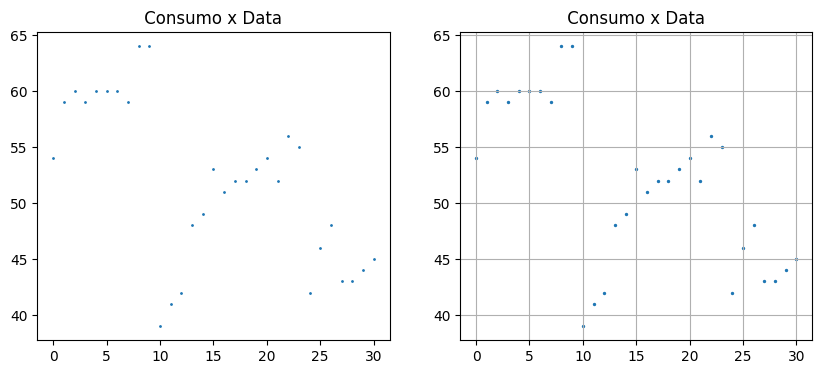

In [8]:
# plots não determinísticos
non_det_x = np.arange(0,31)
non_det_y = np.array([
54,
59,
60,
59,
60,
60,
60,
59,
64,
64,
39,
41,
42,
48,
49,
53,
51,
52,
52,
53,
54,
52,
56,
55,
42,
46,
48,
43,
43,
44,
45])

# plotar determinísticos vs. não determinísticos
fig, axs = plt.subplots(1, 2, figsize=(10,4))



axs[0].scatter(non_det_x, non_det_y, s=1)
axs[0].set_title(" Consumo x Data ") #não determinístico #consumo em %



axs[1].scatter(non_det_x, non_det_y, s=2)
axs[1].set_title(" Consumo x Data ") #não determinístico #consumo em %





plt.grid()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
from sklearn.metrics import r2_score
print('R2 Score:', r2_score(non_det_x, non_det_y)) #resultado seria 1 ou -1 proximo, mumeros ideias

R2 Score: -18.55483870967742


In [11]:
# criar modelo linear e otimizar
lm_model = LinearRegression()
lm_model.fit(non_det_x.reshape(-1,1), non_det_y)

# extrair coeficientes
slope = lm_model.coef_
intercept = lm_model.intercept_


In [12]:
print("b0: \t{}".format(intercept))
print("b1: \t{}".format(slope[0]))

b0: 	59.030241935483865
b1: 	-0.47943548387096757


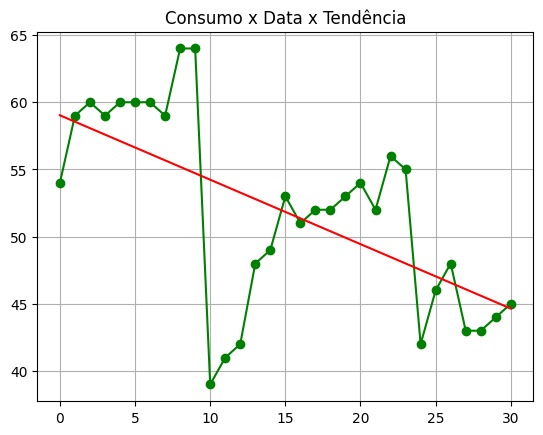

In [13]:
# plotar pontos e retas com parâmetros otimizados
plt.scatter(non_det_x, non_det_y, s=12)
plt.plot(non_det_x, non_det_y, color="green", marker="o", label="Array elements")
plt.plot(non_det_x, (non_det_x * slope + intercept), color='r')
plt.title("Consumo x Data x Tendência")
plt.grid()
plt.show()